# Final Comparison: Hybrid QCNN vs LiDAR vs Fused

In [10]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.dpi'] = 120

In [11]:
root = Path('/home/gurman_preet_526_gmail_com/lusnar_slam')

# === Hybrid QCNN results ===
res_qcnn = root / 'results_qcnn_hybrid'
t_gt_q = np.load(res_qcnn / 't_gt.npy')
t_cam = np.load(res_qcnn / 't_cam_qcnn_hybrid.npy')

# === LiDAR results ===
res_icp = root / 'results_icp'
t_gt_l = np.load(res_icp / 't_gt.npy')
t_lidar = np.load(res_icp / 't_lidar.npy')

# === Fused results ===
res_fuse = root / 'results_fusion'
t_gt_f = np.load(res_fuse / 't_gt.npy')
t_fused = np.load(res_fuse / 't_fused.npy')

# === Align lengths ===
N = min(t_gt_q.shape[0], t_gt_l.shape[0], t_gt_f.shape[0],
        t_cam.shape[0], t_lidar.shape[0], t_fused.shape[0])

t_gt = t_gt_q[:N]
t_cam = t_cam[:N]
t_lidar = t_lidar[:N]
t_fused = t_fused[:N]

print('Frames:', N)

def translation_rmse(pred, gt):
    diff = pred - gt
    err = np.linalg.norm(diff, axis=1)
    return float(np.sqrt(np.mean(err**2))), err

rmse_cam, err_cam = translation_rmse(t_cam, t_gt)
rmse_lidar, err_lidar = translation_rmse(t_lidar, t_gt)
rmse_fused, err_fused = translation_rmse(t_fused, t_gt)

print('Hybrid QCNN RMSE [m]:', rmse_cam)
print('LiDAR RMSE [m]:', rmse_lidar)
print('Fused RMSE [m]:', rmse_fused)

Frames: 600
Hybrid QCNN RMSE [m]: 4.7111855639252145
LiDAR RMSE [m]: 11.322003291844116
Fused RMSE [m]: 0.42188815060317403


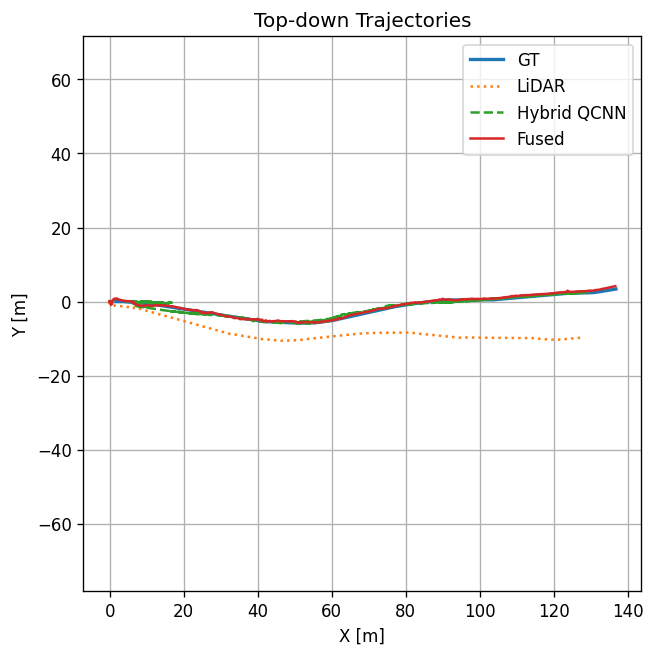

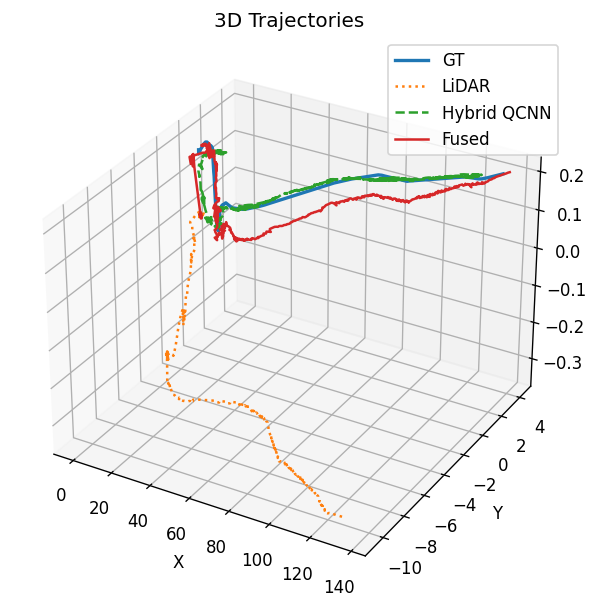

Saved 3D trajectory figure to: /home/gurman_preet_526_gmail_com/lusnar_slam/results_qcnn_hybrid/trajectory_3d.png
=== RMSE (m) ===
Hybrid QCNN : 4.711
LiDAR       : 11.322
Fused       : 0.422

=== Improvement (%) ===
QCNN over LiDAR : 58.39%
Fused over LiDAR: 96.27%
Fused over QCNN : 91.04%


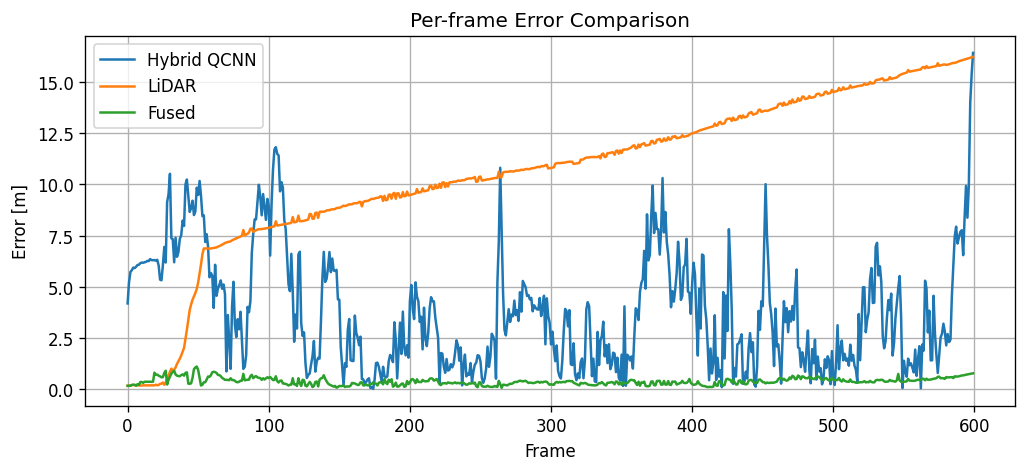

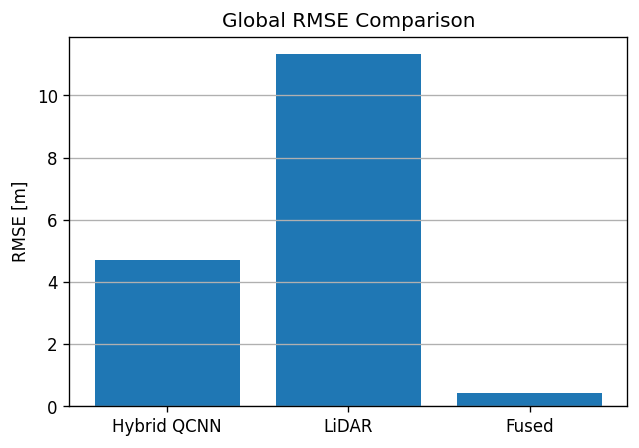

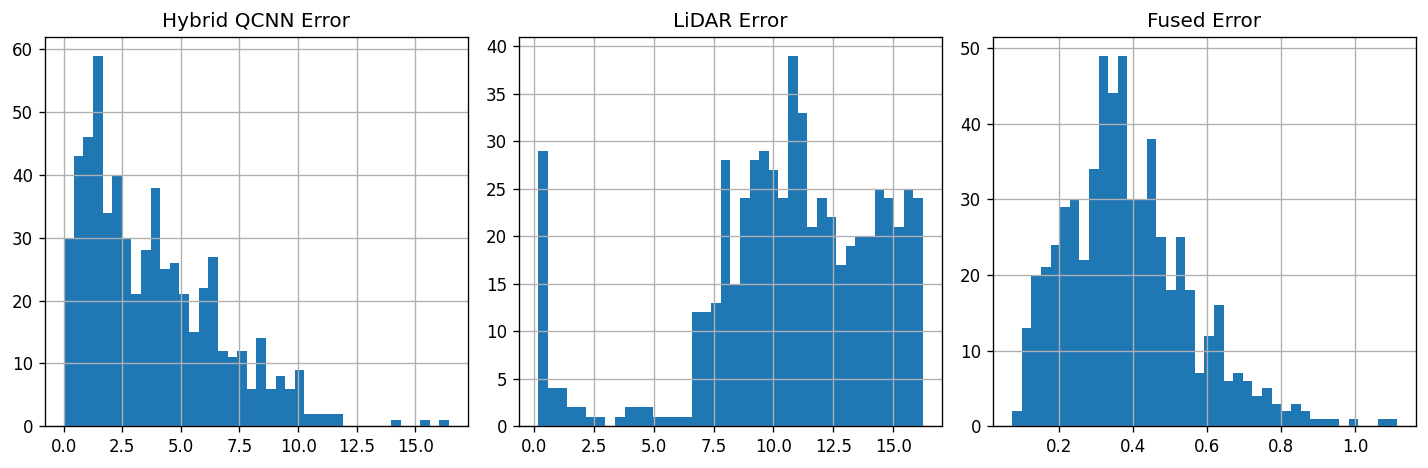

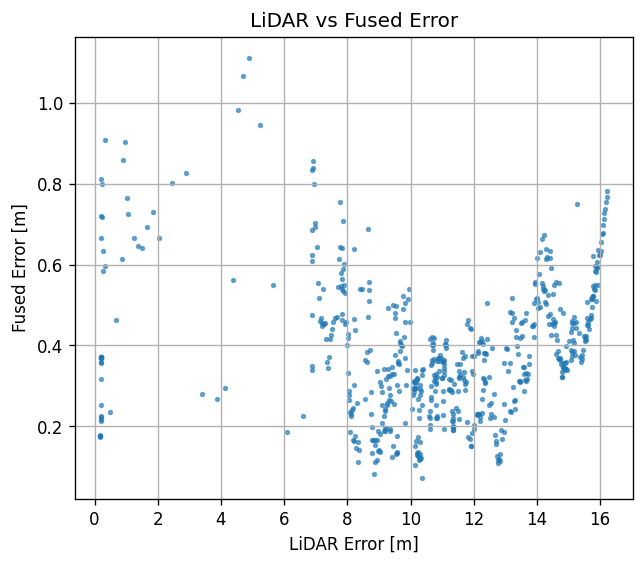

In [18]:
# === 2D top-down trajectories ===
plt.figure(figsize=(6,6))
plt.plot(t_gt[:,0], t_gt[:,1], label='GT', linewidth=2)
plt.plot(t_lidar[:,0], t_lidar[:,1], label='LiDAR', linestyle=':')
plt.plot(t_cam[:,0], t_cam[:,1], label='Hybrid QCNN', linestyle='--')
plt.plot(t_fused[:,0], t_fused[:,1], label='Fused', linestyle='-')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Top-down Trajectories')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


# === 3D trajectories ===
fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(t_gt[:,0], t_gt[:,1], t_gt[:,2], label='GT', linewidth=2)
ax.plot(t_lidar[:,0], t_lidar[:,1], t_lidar[:,2], label='LiDAR', linestyle=':')
ax.plot(t_cam[:,0], t_cam[:,1], t_cam[:,2], label='Hybrid QCNN', linestyle='--')
ax.plot(t_fused[:,0], t_fused[:,1], t_fused[:,2], label='Fused', linestyle='-')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectories')
ax.legend()

# === SAVE FIGURE (exact visual) ===
save_path = root / "results_qcnn_hybrid" / "trajectory_3d.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

print("Saved 3D trajectory figure to:", save_path)


# === CLEAN INFORMATION BLOCK (exactly below plot) ===
print("=== RMSE (m) ===")
print(f"Hybrid QCNN : {rmse_cam:.3f}")
print(f"LiDAR       : {rmse_lidar:.3f}")
print(f"Fused       : {rmse_fused:.3f}")


# % Improvements
pc_qcnn_vs_lidar = (rmse_lidar - rmse_cam) / rmse_lidar * 100
pc_fused_vs_lidar = (rmse_lidar - rmse_fused) / rmse_lidar * 100
pc_fused_vs_qcnn = (rmse_cam - rmse_fused) / rmse_cam * 100

print("\n=== Improvement (%) ===")
print(f"QCNN over LiDAR : {pc_qcnn_vs_lidar:.2f}%")
print(f"Fused over LiDAR: {pc_fused_vs_lidar:.2f}%")
print(f"Fused over QCNN : {pc_fused_vs_qcnn:.2f}%")


# === Per-frame error ===
frames = np.arange(N)
plt.figure(figsize=(10,4))
plt.plot(frames, err_cam, label='Hybrid QCNN')
plt.plot(frames, err_lidar, label='LiDAR')
plt.plot(frames, err_fused, label='Fused')
plt.xlabel('Frame')
plt.ylabel('Error [m]')
plt.title('Per-frame Error Comparison')
plt.grid(True)
plt.legend()
plt.show()

# === Global RMSE bar chart ===
plt.figure(figsize=(6,4))
plt.bar(['Hybrid QCNN','LiDAR','Fused'], [rmse_cam, rmse_lidar, rmse_fused])
plt.ylabel('RMSE [m]')
plt.title('Global RMSE Comparison')
plt.grid(axis='y')
plt.show()

# === Error histograms ===
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(err_cam, bins=40)
plt.title('Hybrid QCNN Error')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(err_lidar, bins=40)
plt.title('LiDAR Error')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(err_fused, bins=40)
plt.title('Fused Error')
plt.grid(True)
plt.tight_layout()
plt.show()

# === Scatter: LiDAR error vs Fused error ===
plt.figure(figsize=(6,5))
plt.scatter(err_lidar, err_fused, s=5, alpha=0.6)
plt.xlabel('LiDAR Error [m]')
plt.ylabel('Fused Error [m]')
plt.title('LiDAR vs Fused Error')
plt.grid(True)
plt.show()